In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.animation as animation
from tqdm import tqdm

In [2]:
def GetA(r):
    
    x0 = r
    a= -x0
    
    return np.array([a])
def funcion(r,t):
    return np.array([-r])

w0 = - ( 2.**(1./3.))/(2. - 2.**(1./3.))
w1 =  ( 1. )/( 2. - 2.**(1./3.))
c1 = w1/2.
c2 = (w0 + w1)/2.
c3 = c2
c4 = c1
d1 = w1
d2 = w0
d3 = d1

In [3]:
def GetSimplecticAlgorithm(f,r0,v0,t):
    
    h = t[1] - t[0]
    r = np.zeros((len(t),2))
    v = np.zeros_like(r)
    E = np.zeros(len(t))
    
    
    r[0] = r0
    v[0] = v0
    E[0] = 0.5*v0**2 + 0.5*r0**2
    
    for i in range(1,len(t)):
        
        r1 = r[i-1] + c1*v[i-1]*h
        v1 = v[i-1] + d1*h*f(r1)
        
        r2 = r1 + c2*v1*h
        v2 = v1 + d2*h*f(r2)
        
        r3 = r2 + c3*v2*h
        v3 = v2 + d3*h*f(r3)
        
        r[i] = r3 + c4*v3*h
        v[i] = v3
        E[i] = 0.5*v[i,0]**2 + 0.5*r[i,0]**2
        
    return r,v,t,E

def LeapFrog(f,x0,t):
    
    h = t[1] - t[0]
    
    x = np.zeros_like(t)
    v = np.zeros_like(t)
    E = np.zeros(len(t))
    E[0] = 0.5*x0[1]**2 + 0.5*x0[0]**2
    
    x[0] = x0[0]
    v[0] = x0[1]
    
    for i in range(1,len(t)):
        vhalf = v[i-1] + 0.5*h*f(x[i-1],t[i-1])
        
        x[i] = x[i-1] + h*vhalf
        
        v[i] = vhalf + 0.5*h*f(x[i],t[i])
        
        E[i] = 0.5*v[i]**2 + 0.5*x[i]**2
        
    return x,v,E



In [4]:
t = np.linspace(0,10,1000)
r0 = np.array([1.,0.])
x0 = np.array([1.])
v0 = np.array([0.])
r,v,t0,E = GetSimplecticAlgorithm(GetA,x0,v0,t)
x,v,Ef = LeapFrog(funcion,r0,t)


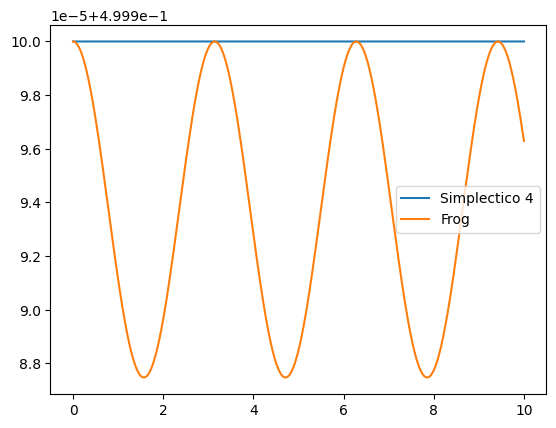

In [5]:
plt.plot(t0,E,label = "Simplectico 4")
plt.plot(t,Ef,label = "Frog")
plt.legend()

Note que el simplectico es mucho más preciso, ya que no oscila tanto como el de Leapfrog